In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

In [2]:
# from IPython.display import HTML
# HTML('''<script>
#   function code_toggle() {
#     if (code_shown){
#       $('div.input').hide('500');
#       $('#toggleButton').val('Show Code')
#     } else {
#       $('div.input').show('500');
#       $('#toggleButton').val('Hide Code')
#     }
#     code_shown = !code_shown
#   }
#   $( document ).ready(function(){
#     code_shown=false;
#     $('div.input').hide()
#   });
# </script>
# <form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

Pandemic COVID-19 has engulfed the world in a blink of an eye. One by one countries are falling like a domino effect and the global leaders across the world are grappling with this truth. 

Like everyone, I too have quarantined myself (the least I can do to help). We are living in the world of data and over the last few days, one of the most important achievements of World Health Organization (thanks to co-operation of all the countries) was a meticulous collation of COVID-19 datasets. Soon the data was made public and I was amazed by the enormous amount of insightful analysis provided by data scientists, kagglers across the world. 

I too wanted to contribute and here goes a very naive analysis of mine on COVID-19 outbreak thanks to the wonderful dataset below which includes time series of confirmed , deaths, and recovery data across different countries. 


Datasets 'https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data'

In [3]:
covid_cnf_ts = pd.read_csv('time_series_19-covid-Confirmed.csv')
covid_de_ts = pd.read_csv('time_series_19-covid-Deaths.csv')
covid_re_ts = pd.read_csv('time_series_19-covid-Recovered.csv')

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
date_columns = list(covid_cnf_ts.iloc[:,4:].columns)
covid_cnf_ts = covid_cnf_ts[covid_cnf_ts['Country/Region'] != 'Cruise Ship']
covid_de_ts = covid_de_ts[covid_de_ts['Country/Region'] != 'Cruise Ship']
covid_re_ts = covid_re_ts[covid_re_ts['Country/Region'] != 'Cruise Ship']

covid_cnf_ts_grouped = covid_cnf_ts.groupby('Country/Region')[date_columns].sum()
covid_de_ts_grouped = covid_de_ts.groupby('Country/Region')[date_columns].sum()
covid_re_ts_grouped = covid_re_ts.groupby('Country/Region')[date_columns].sum()

In [6]:
covid_details = pd.concat([covid_cnf_ts_grouped.iloc[:,-1],covid_re_ts_grouped.iloc[:,-1], covid_de_ts_grouped.iloc[:,-1]], axis = 1 )
covid_details.columns =['Confirmed', 'Recovery', 'Death']
covid_details = covid_details[(covid_details['Confirmed'] > 150) & (covid_details['Recovery'] > 10) & (covid_details['Death']>0)]


In [7]:
covid_cnf_aggregate = covid_cnf_ts_grouped.T.sum()
covid_cnf_ts_grouped['Total'] = covid_cnf_aggregate
sort_cnf = covid_cnf_ts_grouped.sort_values(by = ['Total'], ascending = False)
affected_countries_confirmed = covid_cnf_ts_grouped
affected_countries_confirmed = affected_countries_confirmed.ix[sort_cnf.index].dropna()
affected_countries_confirmed = affected_countries_confirmed[affected_countries_confirmed.iloc[:,-2]>150]

covid_de_aggregate = covid_de_ts_grouped.T.sum()
covid_de_ts_grouped['Total'] = covid_de_aggregate
sort_de = covid_de_ts_grouped.sort_values(by = ['Total'], ascending = False)
affected_countries_death = covid_de_ts_grouped
affected_countries_death = affected_countries_death.ix[sort_de.index].dropna()
affected_countries_death = covid_de_ts_grouped[covid_de_ts_grouped.iloc[:,-2]> 20]

covid_re_aggregate = covid_re_ts_grouped.T.sum()
covid_re_ts_grouped['Total'] = covid_re_aggregate
sort_re = covid_re_ts_grouped.sort_values(by = ['Total'], ascending = False)
affected_countries_recovery = covid_re_ts_grouped
affected_countries_recovery = affected_countries_recovery.ix[sort_re.index].dropna()
affected_countries_recovery = covid_re_ts_grouped[covid_re_ts_grouped.iloc[:,-2] > 100]


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


The plots below show a time series of confirmed cases (>150) by country and clearly China, Italy, Iran, Spain are all leading the charts. India, however, inspite of being the second most populated country, has shown commendable 'resistance' to Corona Virus outbreak. 

In [18]:
affected_countries_confirmed.loc['Pakistan']

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
1/27/20       0
1/28/20       0
1/29/20       0
1/30/20       0
1/31/20       0
2/1/20        0
2/2/20        0
2/3/20        0
2/4/20        0
2/5/20        0
2/6/20        0
2/7/20        0
2/8/20        0
2/9/20        0
2/10/20       0
2/11/20       0
2/12/20       0
2/13/20       0
2/14/20       0
2/15/20       0
2/16/20       0
2/17/20       0
2/18/20       0
2/19/20       0
2/20/20       0
           ... 
2/22/20       0
2/23/20       0
2/24/20       0
2/25/20       0
2/26/20       2
2/27/20       2
2/28/20       2
2/29/20       4
3/1/20        4
3/2/20        4
3/3/20        5
3/4/20        5
3/5/20        5
3/6/20        6
3/7/20        6
3/8/20        6
3/9/20        6
3/10/20      16
3/11/20      19
3/12/20      20
3/13/20      28
3/14/20      31
3/15/20      53
3/16/20     136
3/17/20     236
3/18/20     299
3/19/20     454
3/20/20     501
3/21/20     730
Total      2580
Name: Pakistan, Length: 

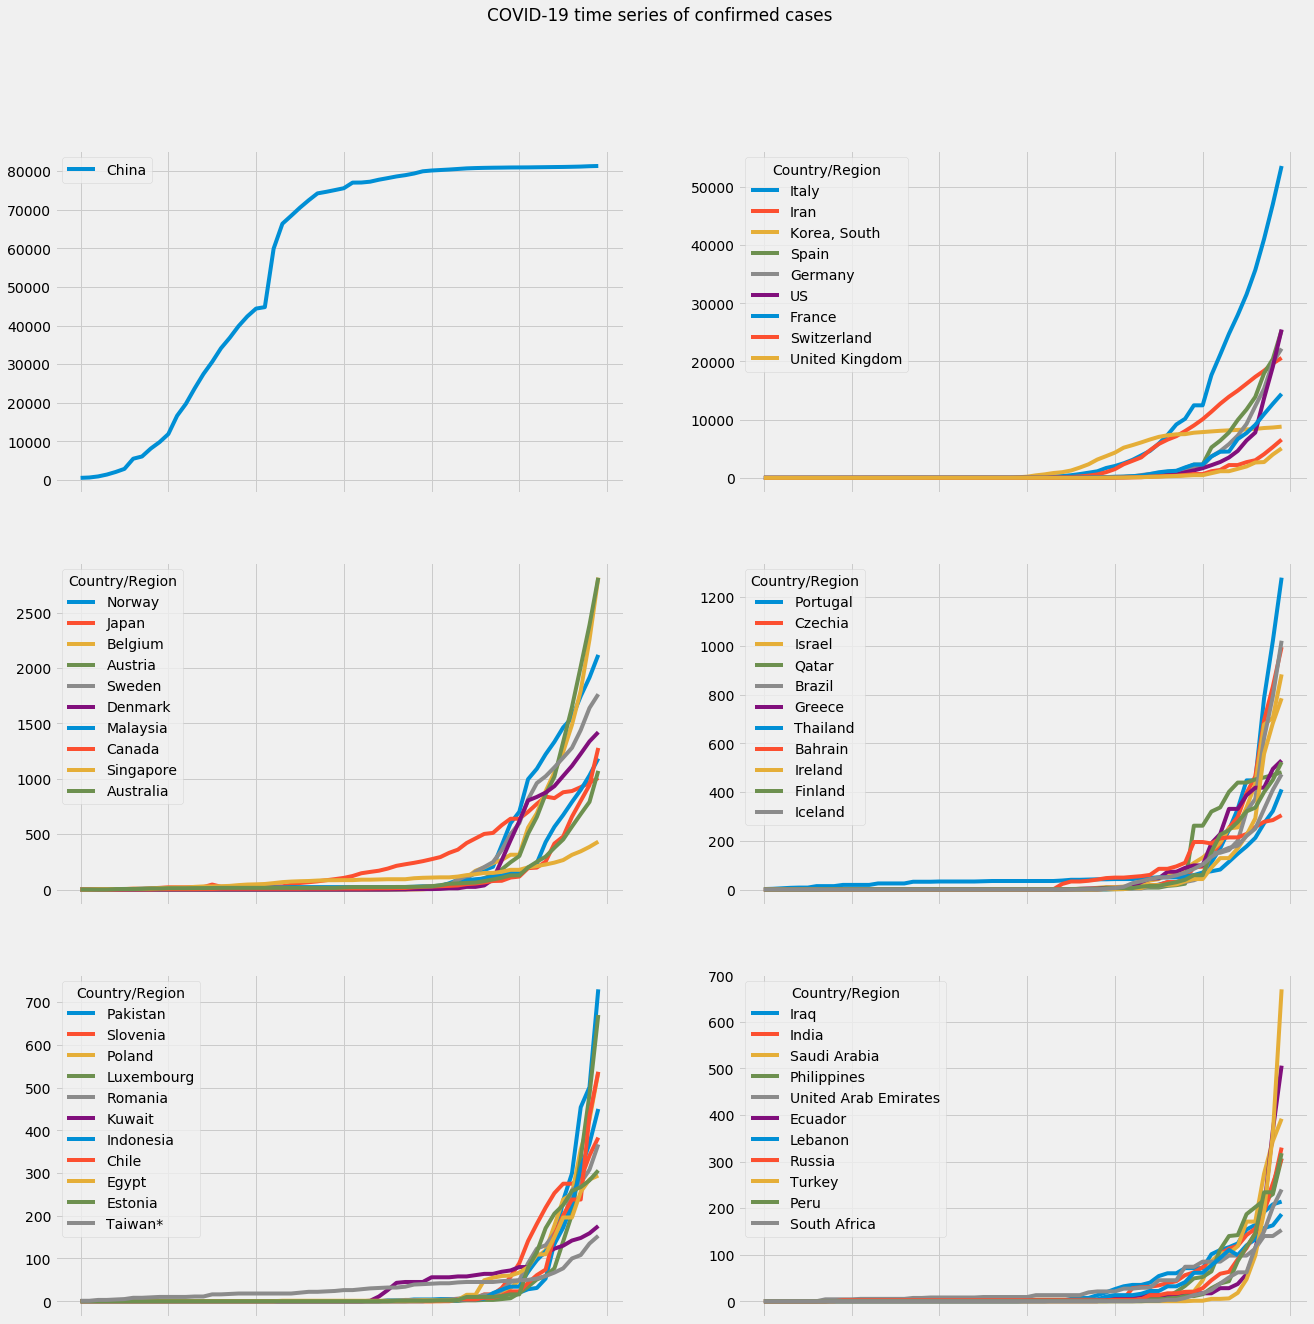

In [19]:
fig = plt.figure(figsize = (20,20))
affected_countries_confirmed.iloc[0,:-1].plot(ax = fig.add_subplot(3,2,1))
plt.legend()
affected_countries_confirmed.iloc[1:10,:-1].T.plot(ax = fig.add_subplot(3,2,2))
# plt.legend()
affected_countries_confirmed.iloc[11:21,:-1].T.plot(ax = fig.add_subplot(3,2,3))
affected_countries_confirmed.iloc[21:32,:-1].T.plot(ax = fig.add_subplot(3,2,4))
affected_countries_confirmed.iloc[32:43,:-1].T.plot(ax = fig.add_subplot(3,2,5))
affected_countries_confirmed.iloc[43:54,:-1].T.plot(ax = fig.add_subplot(3,2,6))
plt.suptitle('COVID-19 time series of confirmed cases')
plt.show()

So far China and Italy have witnessed large number of deaths; while China was able to take control of the pandemic,conditions in Italy are worsening with each day. The success rate in South Korea in tackling the virus appears to be the highest in plots below. Here, for the plots, I have selected countries that had more than 1 deaths and 10 recoveries.

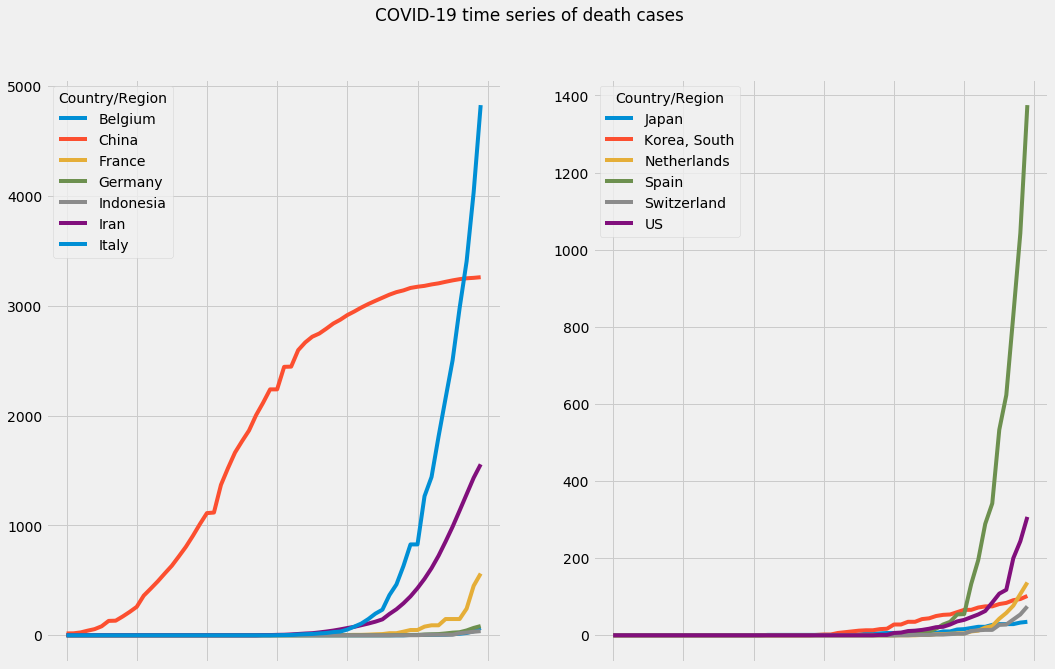

In [20]:
fig = plt.figure(figsize = (16,10))
# affected_countries_death.iloc[0,:-1].plot(ax = fig.add_subplot(1,2,1))
affected_countries_death.iloc[:7,:-1].T.plot(ax = fig.add_subplot(1,2,1))
# plt.legend()
affected_countries_death.iloc[7:13,:-1].T.plot(ax = fig.add_subplot(1,2,2))
# affected_countries_death.iloc[33:43,:-1].T.plot(ax = fig.add_subplot(3,2,5))
# affected_countries_death.iloc[44:52,:-1].T.plot(ax = fig.add_subplot(3,2,6))

plt.suptitle('COVID-19 time series of death cases')

plt.show()


In [21]:
recovery_cnf = covid_details['Recovery']/covid_details['Confirmed']
death_cnf = covid_details['Death']/covid_details['Confirmed']
death_recovery = covid_details['Death']/covid_details['Recovery']

In [22]:
covid_details

,Confirmed,Recovery,Death
Country/Region,,,
Australia,1071,26,7
Bahrain,305,125,1
Belgium,2815,263,67
China,81305,71857,3259
Egypt,294,41,10
France,14431,12,562
Germany,22213,233,84
Greece,530,19,13
Iceland,473,22,1


Text(0.5,1,'Death to Confirmed cases')

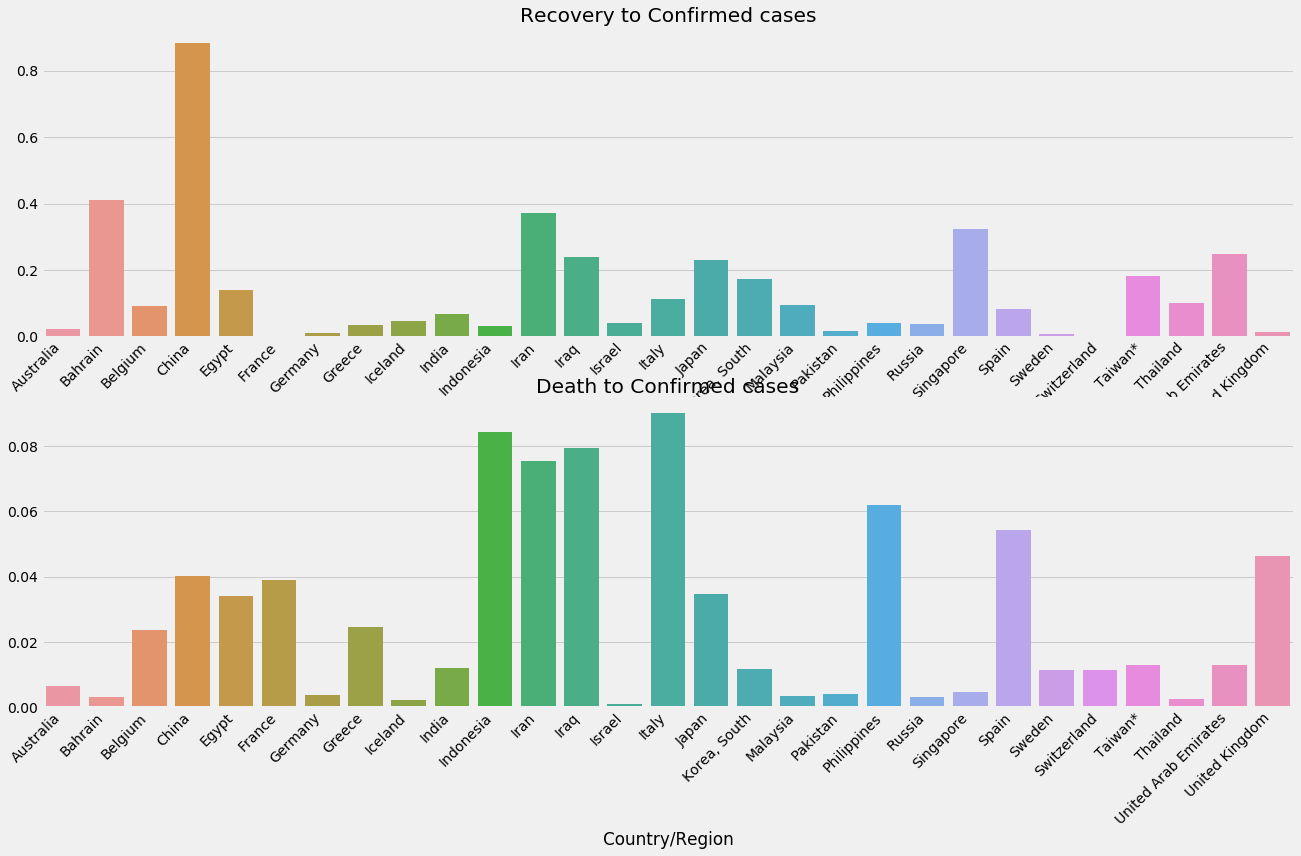

In [25]:
plt.figure(figsize = (20,18))
plt.subplot(3,1,1)
sns.barplot(recovery_cnf.index, recovery_cnf)
plt.xticks(rotation=45, ha="right")
plt.title('Recovery to Confirmed cases')

plt.subplot(3,1,2)
sns.barplot(death_cnf.index, death_cnf)
plt.xticks(rotation=45, ha="right")
plt.title('Death to Confirmed cases')

# plt.subplot(3,1,3)
# sns.barplot(death_recovery.index, death_recovery)
# plt.xticks(rotation=45, ha="right")
# plt.title('Death to Recovered cases')

While China shows highest recovery to confirmed cases, it appears to have effectively controlled death rates, where Italy and Indonesia have failed followed by Iraq and Iran. Based on the dataets it seems that UK and Spain are too heading towards a disaster. 

The time series of confirmed cases in China provided one interpretable insight about the virus outbreak- that the confirmed cases follow a logistic growth curve. The logistic growth curve (also known as population curve) qualifies as an idea model for these cases, the outbreak will initially be expected to occur at an exponential rate followed by a gradual slowdown due to government measures, vaccination programs, immunity development against the virus and so on. Hence, I have extended a similar model for investigation of COVID-19 outbreak in other countries as well. 

The logistic function  introduced by Pierre François Verhulst can be expressed as :


$$y = \frac{L}{1+\exp^{-k(x-x_0)}}$$

$x_0$ is the value at midpoint of the curve (or here time at which curve reaches the midpoint), $L$ is the maximum value of curve  and $k$ represents growth rate.

In order to scale the curve between (0-1) we can set L = 1. In this analysis, I have kept both functionalities for users to view and try out. However, the analysis below is performed after scaling the confirmed cases between 0 to 1 i.e. for example if number of constraind increases from 0 to 3000 for one country while 0 to 30000 for the other, growth rates for both countries can be compared after standardising them to the same scale between 0 and 1. 

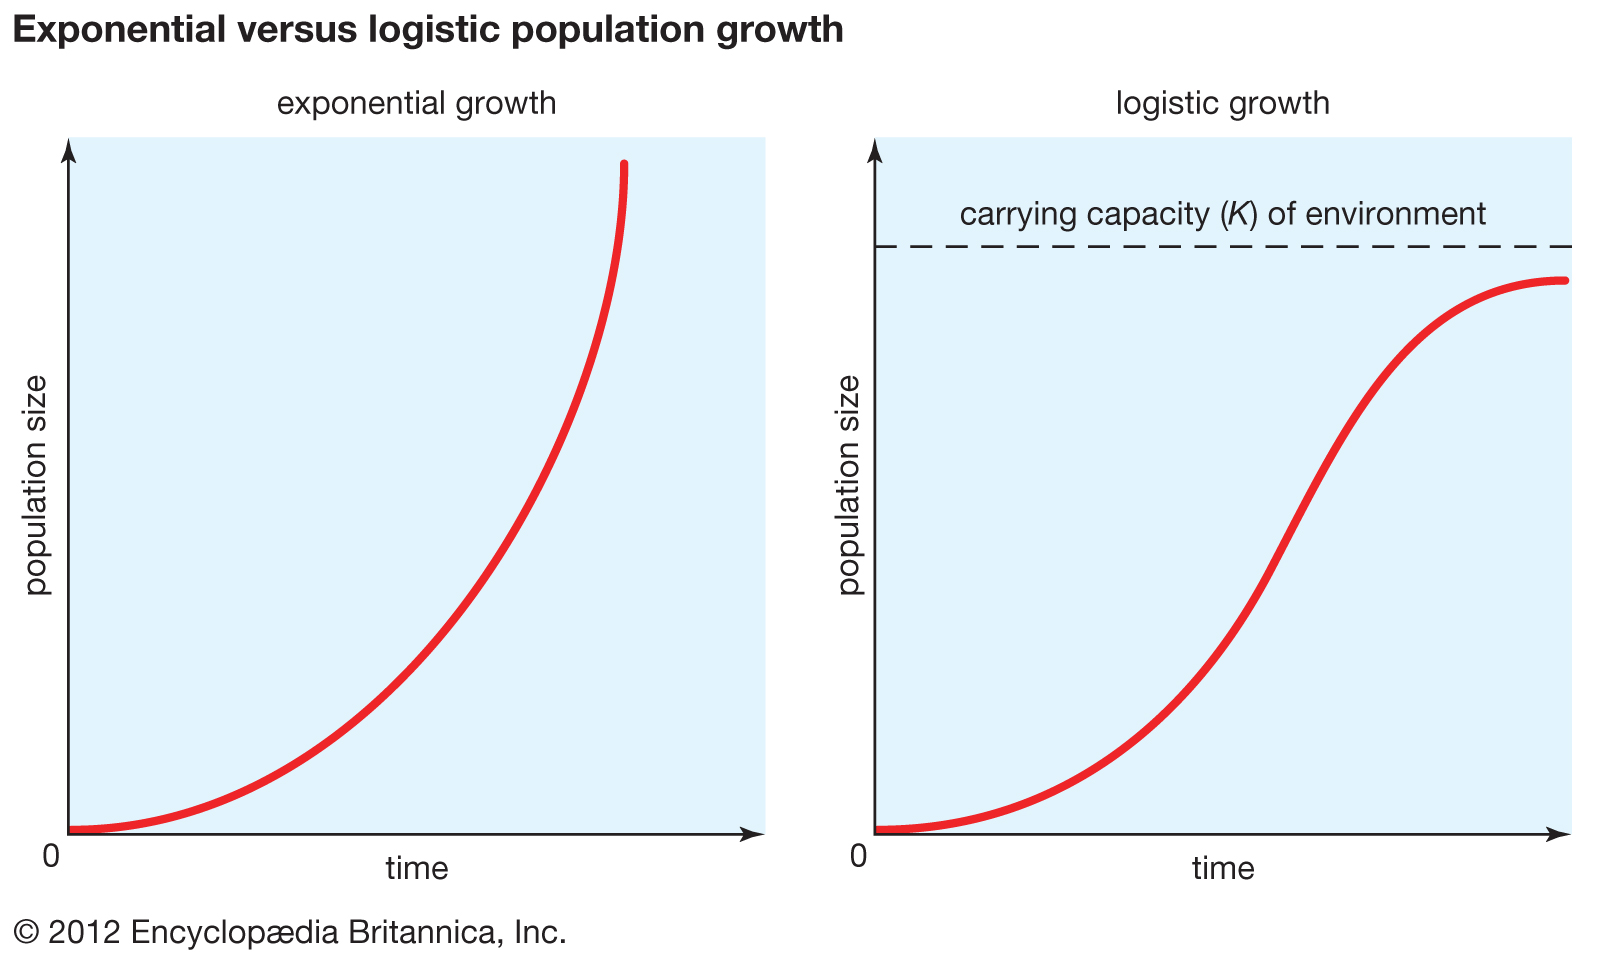

In [26]:
from IPython.display import Image
Image(filename='environment-populations-rate-growth-curve-competition-resources.jpg')



In [27]:
# fig = plt.figure(figsize = (16,8))
# affected_countries_recovery.iloc[:,:-2].T.plot(ax = fig.add_subplot(1,2,2))
# # plt.legend()
# # affected_countries_death.iloc[11:21,:-1].T.plot(ax = fig.add_subplot(3,2,3))
# # affected_countries_death.iloc[22:32,:-1].T.plot(ax = fig.add_subplot(3,2,4))
# # affected_countries_death.iloc[33:43,:-1].T.plot(ax = fig.add_subplot(3,2,5))
# # affected_countries_death.iloc[44:52,:-1].T.plot(ax = fig.add_subplot(3,2,6))



In [28]:
def covid_likelihood(params, *data):
    '''Constructs a likelihood based on the data observed'''
    
    k = params[0]
    b= params[1]
    sd = params[2]
    y_dat = data
    f = 1/(1+np.exp(-k*(x_dat-b)))
#     print(stats.norm.logpdf(y_dat, f, sd))
    likelihood = - np.sum(stats.norm.logpdf(y_dat/y_dat[-1], f, sd))
    return likelihood

def sigmoid(x,a,b,c):
    '''Non scaled sigmoid function to model the data'''
    c = 1
    f = c/(1+np.exp(-(x-b)/a))
    return f

def sigmoid_1(x,a,b):
    '''Scaled sigmoid function to model the normalized data'''
    f = 1/(1+np.exp(-(x-b)/a))
    return f

def get_param_estimate(function, initparams):
    estimates = minimize(covid_likelihood, [1,1,1], method = 'Nelder-Mead')
    return estimates.x

def func_exp(x, a,b, c):
    c = 0
    return a * np.exp(b * x) + c

def parameter_estimations(x, y, scale_flag):
    '''Provides functionality for parameter estimations 
    with or without scaling (provided by scale_flag)'''
    if scale_flag:
        y_scale = y/y[-1]
        p0 = [2, np.argmax(y)]
        popt, pcov = curve_fit(sigmoid_1, x, y_scale, p0, method='dogbox',maxfev=100000)
        parameter = [popt[0], popt[1]]
    else:
        p0 = [2, np.argmax(y_dat), np.max(y)]
        popt, pcov = curve_fit(func_exp, x, y, p0 , maxfev = 10000)
        parameter = [popt[0], popt[1], popt[2]]
    return parameter

In [29]:
y_dat = affected_countries_confirmed.iloc[34,:-1].values
x_dat = np.arange(0,len(affected_countries_recovery.iloc[0,:-1].values))


In [30]:
#A sample parameter estimation 
parameter_estimations(x_dat, y_dat, True)

[2.0041673338739883, 55.4400956409433]

Estimating parameters for all the countries in the analysis.

In [31]:
covid_parameter_dict = {}
for i in range(len(affected_countries_confirmed)):
    y_dat = affected_countries_confirmed.iloc[i,:-2].values
    x_dat = np.arange(0,len(affected_countries_recovery.iloc[0,:-2].values))
    parameter = parameter_estimations(x_dat, y_dat, True)
    covid_parameter_dict[affected_countries_confirmed.index[i]] = parameter
    

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: overflow encountered in exp


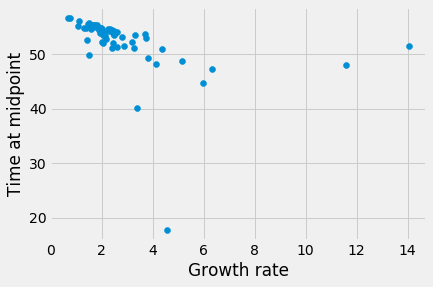

In [32]:
parameter_dataframe = pd.DataFrame(covid_parameter_dict)
parameter_dataframe = parameter_dataframe.T
parameter_dataframe
parameter_dataframe.columns = ['param_1', 'param_2']
plt.scatter(parameter_dataframe['param_1'], parameter_dataframe['param_2'])
plt.xlabel('Growth rate')
plt.ylabel ('Time at midpoint')
plt.show()

In [33]:
parameter_dataframe

,param_1,param_2
Argentina,2.491237,54.229937
Armenia,1.358409,54.777859
Australia,2.456685,53.697773
Austria,2.034070,54.114178
Bahrain,4.112496,48.182657
Belgium,2.452487,53.943007
Brazil,1.645149,55.351515
Bulgaria,1.995070,54.236411
Canada,1.909430,54.356705
Chile,1.799522,55.404553


In [34]:
scaler = MinMaxScaler()
param_scaled = scaler.fit_transform(parameter_dataframe.iloc[:,:2])
param_scaled_df = pd.DataFrame(param_scaled)
param_scaled_df.columns = ['Param_1', 'Param_2']

In [35]:
# from sklearn.cluster import KMeans
# from sklearn.cluster import DBSCAN
# error_list = []
# for i in range(1,6):
# #     print(i)/
#     model = KMeans(i, random_state =24).fit(parameter_dataframe.iloc[:,:2])
#     error = model.inertia_
#     error_list.append(error)
# plt.plot(error_list)

Next, a density based clustering (DSCAN) is performed in this parameter space to group countries with similar parameter coordinates (states).  

$$\textbf{Here we have scaled the parameters before clustering}$$

In [36]:
model_1 = DBSCAN(0.05,3).fit(param_scaled_df)
cluster_labels_1 = model_1.labels_
param_scaled_df['cluster'] = cluster_labels_1
# y_kmeans = model.predict(parameter_dataframe)

In [37]:
cluster_labels_1

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0])

In [38]:
param_scaled_df.index = parameter_dataframe.index

In [39]:
o_x, o_y = param_scaled_df[param_scaled_df['cluster']==-1]['Param_1'], param_scaled_df[param_scaled_df['cluster']==-1]['Param_2']
c_x, c_y = param_scaled_df[param_scaled_df['cluster']==0]['Param_1'], param_scaled_df[param_scaled_df['cluster']==0]['Param_2']
# cl2_x, cl2_y = param_scaled_df[param_scaled_df['cluster']==1]['param_1'], param_scaled_df[param_scaled_df['cluster']==1]['param_2']
# cl3_x,cl3_y = param_scaled_df[param_scaled_df['cluster']==2]['param_1'], param_scaled_df[param_scaled_df['cluster']==2]['param_2']

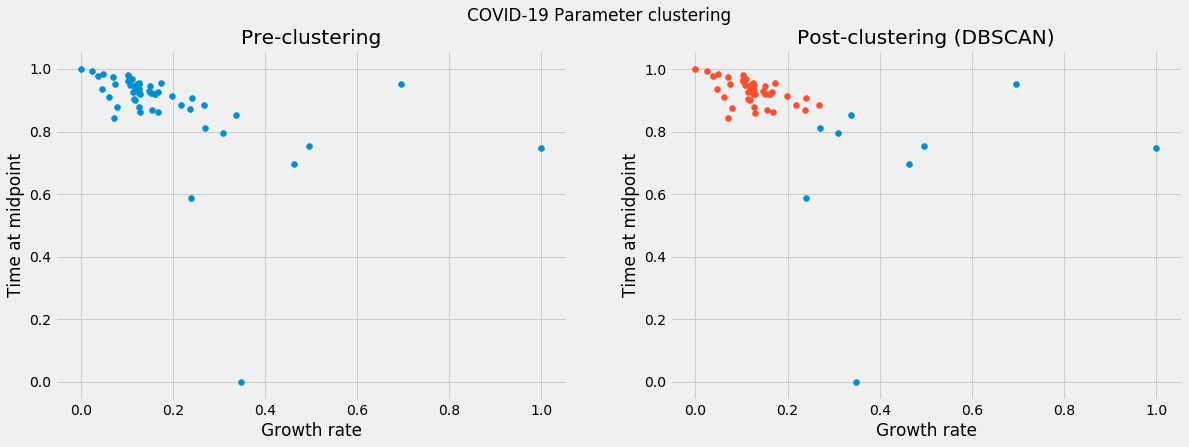

In [29]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.scatter(param_scaled_df['Param_1'], param_scaled_df['Param_2'])
plt.xlabel('Growth rate')
plt.ylabel ('Time at midpoint')
plt.title('Pre-clustering')
plt.subplot(1,2,2)
plt.scatter(o_x,o_y)
plt.scatter(c_x,c_y)
plt.xlabel('Growth rate')
plt.ylabel ('Time at midpoint')
plt.title('Post-clustering (DBSCAN)')
plt.suptitle('COVID-19 Parameter clustering')
# plt.savefig('cv_4.png')
plt.show()

# plt.scatter(cl2_x,cl2_y)
# plt.scatter(cl3_x,cl3_y)

In [31]:
outlier_1 = param_scaled_df[param_scaled_df['cluster']== -1]

The clustering algorithm was able to detect 7 outliers (detected by blue points). China, Japan, South-Korea, Kuwait and Singapore. As evident from the plots below, the time series of confirmed cases in China and Korea increased exponentially at the beginning and is slowly saturating with time, while the remaining four countries follow a steeper trend. 

In [32]:
outlier_1

,Param_1,Param_2,cluster
Bahrain,0.308555,0.794201,-1
China,0.348011,0.000000,-1
Iran,0.270129,0.811608,-1
Iraq,0.336543,0.853563,-1
Japan,0.463412,0.695851,-1
"Korea, South",0.238817,0.586912,-1
Kuwait,0.495957,0.753883,-1
Singapore,1.000000,0.748183,-1
Thailand,0.695393,0.950961,-1


In [50]:
cluster_11 = param_scaled_df[param_scaled_df['cluster'] == 0]

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


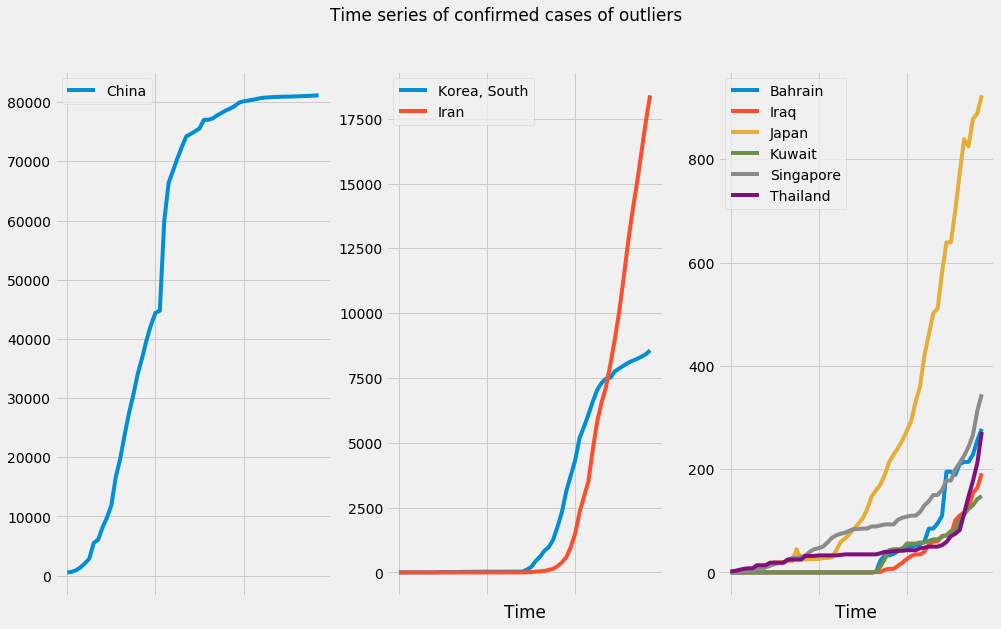

In [46]:
outlier_cnf = affected_countries_confirmed.iloc[:,:-1].ix[outlier_1.index]
fig = plt.figure(figsize =(15,9))
outlier_cnf[outlier_cnf.index == 'China'].iloc[:,:-1].T.plot(ax = fig.add_subplot(1,3,1))
outlier_cnf[outlier_cnf.index == 'Korea, South'].iloc[:,:-1].T.plot(ax = fig.add_subplot(1,3,2))
outlier_cnf[outlier_cnf.index == 'Iran'].iloc[:,:-1].T.plot(ax = fig.add_subplot(1,3,2))
plt.xlabel('Time')
outlier_cnf[(outlier_cnf.index != 'China') & (outlier_cnf.index !='Korea, South') & (outlier_cnf.index !='Iran')].iloc[:,:-1].T.plot(ax = fig.add_subplot(1,3,3))
plt.xlabel('Time')
plt.suptitle('Time series of confirmed cases of outliers ')
# 
plt.show()

In [52]:
cluster_cnf = affected_countries_confirmed.iloc[:,:-1].ix[cluster_11.index]

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


I was particularly interested in identifying the position of my country India with respect to other countries in terms of the parameter set based on the number of confirmed cases till 20.03.2020.

The top 15 countries with parameter states closest (Euclidean distance) to India were - 'Lebanon',
 'Iceland',
 'Italy',
 'Iran',
 'Egypt',
 'Iraq',
 'Bahrain',
 'Sweden',
 'Australia',
 'France',
 'Norway',
 'Netherlands',
 'Israel',
 'Belgium'

In [58]:
param_1_ind = param_scaled_df.loc['India']['Param_1']
param_2_ind = param_scaled_df.loc['India']['Param_2']
distance = {}
for i in param_scaled_df.index:
    par_1 = param_scaled_df.loc[i]['Param_1']
    par_2 = param_scaled_df.loc[i]['Param_2']
    dist = (par_1- param_1_ind)**2 + (par_2- param_2_ind)**2
    distance[i] = dist
import operator
sorted_d = sorted(distance.items(), key=operator.itemgetter(1))
print('Country with Covid growth parameter closest to India:', sorted_d[1:10])

Country with Covid growth parameter closest to India: [('Lebanon', 0.0010754042542473715), ('Iceland', 0.0012427875424691373), ('Italy', 0.0024876623739128407), ('Iran', 0.0052879111279499754), ('Egypt', 0.005741865450395488), ('Iraq', 0.0057511840027528235), ('Bahrain', 0.009822063044153511), ('Sweden', 0.010400452351168123), ('Australia', 0.01182766886558836)]


In [59]:
country_list = [i[0] for i in sorted_d[1:15]]
closest_country_confirmed = affected_countries_confirmed.ix[country_list]

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


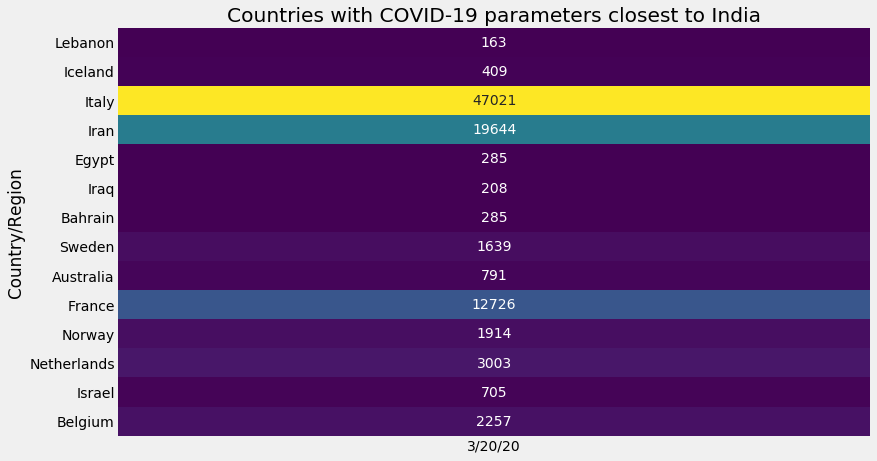

In [60]:
df = pd.DataFrame(affected_countries_confirmed.ix[country_list].iloc[:,-2])
df.column = ['Confirmed cases']
plt.figure(figsize = (12, 7))
sns.heatmap(df, annot=True, cmap='viridis', cbar=False, fmt = 'g')
plt.title('Countries with COVID-19 parameters closest to India')
# plt.savefig('cv_6.png')
plt.show()

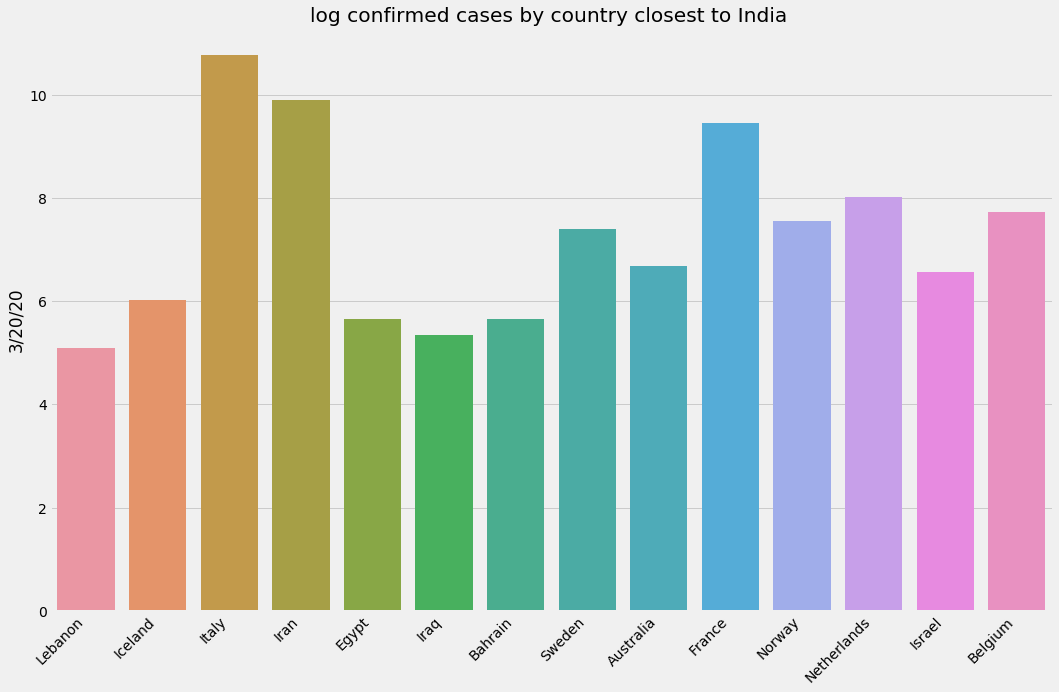

In [61]:
plt.figure(figsize = (16,10))
sns.barplot(country_list, np.log(affected_countries_confirmed.ix[country_list].iloc[:,-2]))
plt.xticks(rotation=45, ha="right")
plt.title('log confirmed cases by country closest to India ')
# plt.savefig('cv_7.png')
plt.show()

Surprising it may seem, but the naive parameter study puts Italy, Iran very close to India in terms of sharing the parameter combinations . However, COVID-19 outbreak, is a far more complex problem and hence the findings are likely to differ with time and  inclusion of several other parameters. 

The second part of this study will be focussing entirely on India and understand the possible pathways of virus outbreak over time. 

Lets continue our fight against COVID-19 through safe physical distancing, self quarantine because 'PREVENTION IS ALWAYS BETTER THAN CURE'.